In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [7]:
df = pd.read_csv('/Users/vinay/Desktop/WeeTech Solution Pvt. Ltd/Time Series/Website Traffic /Thecleverprogrammer.csv')

In [5]:
df.head(10)

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973
5,06/06/2021,9114
6,07/06/2021,10387
7,08/06/2021,8895
8,09/06/2021,9048
9,10/06/2021,8431


In [6]:
df.tail(10)

,Date,Views
381,17/06/2022,10471
382,18/06/2022,9079
383,19/06/2022,10163
384,20/06/2022,11733
385,21/06/2022,11426
386,22/06/2022,11154
387,23/06/2022,10382
388,24/06/2022,9555
389,25/06/2022,8502
390,26/06/2022,8368


In [9]:
df.shape

(391, 2)

In [10]:
df.dtypes

Date     object
Views     int64
dtype: object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Views,391.0,8482.606138,1279.661279,4478.0,7603.0,8363.0,9304.0,12156.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [13]:
df.isnull().sum()

Date     0
Views    0
dtype: int64

In [19]:
df["Date"] = pd.to_datetime(df["Date"], 
                              format="%d/%m/%Y")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


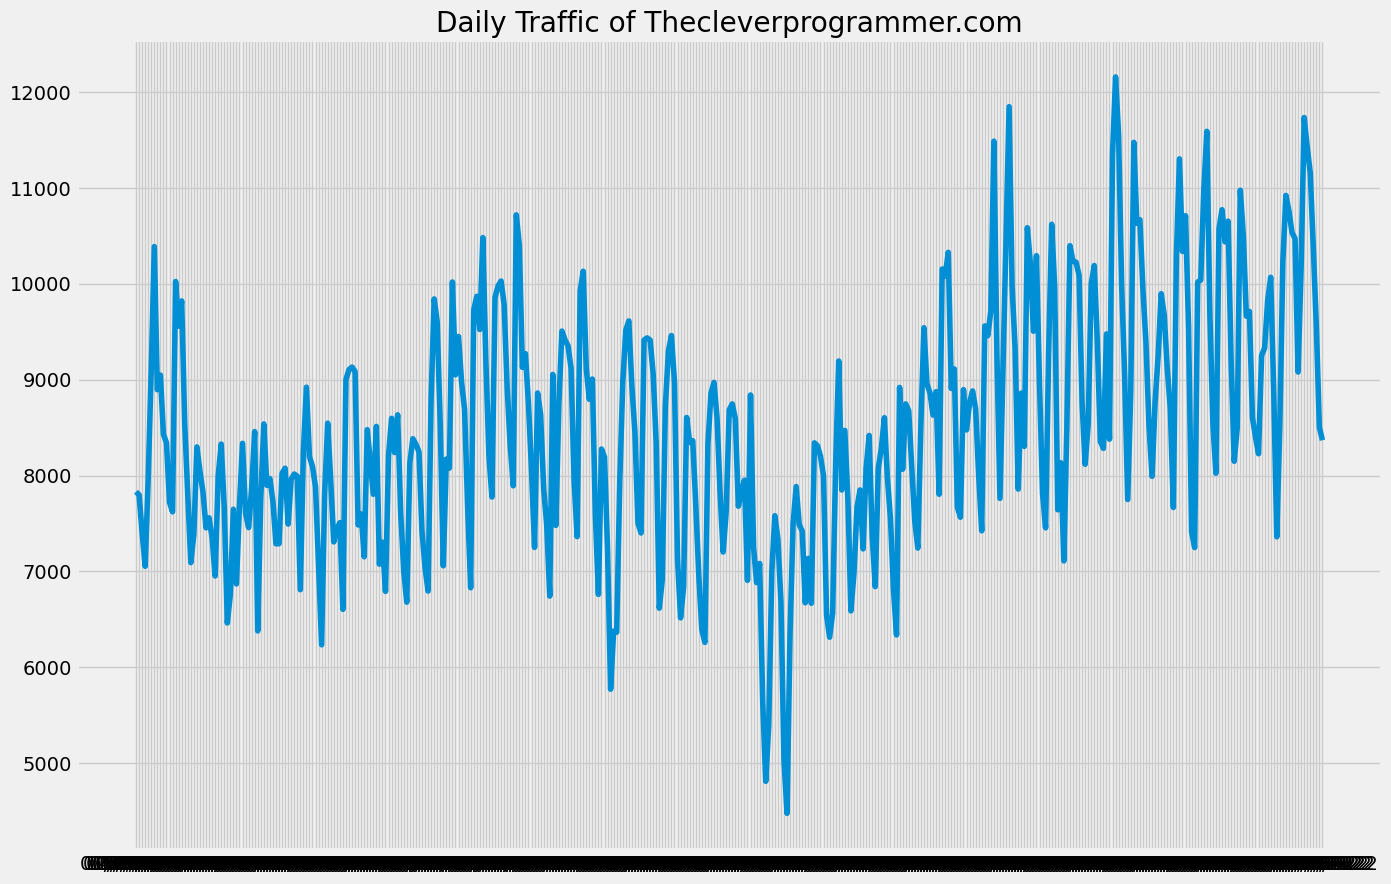

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

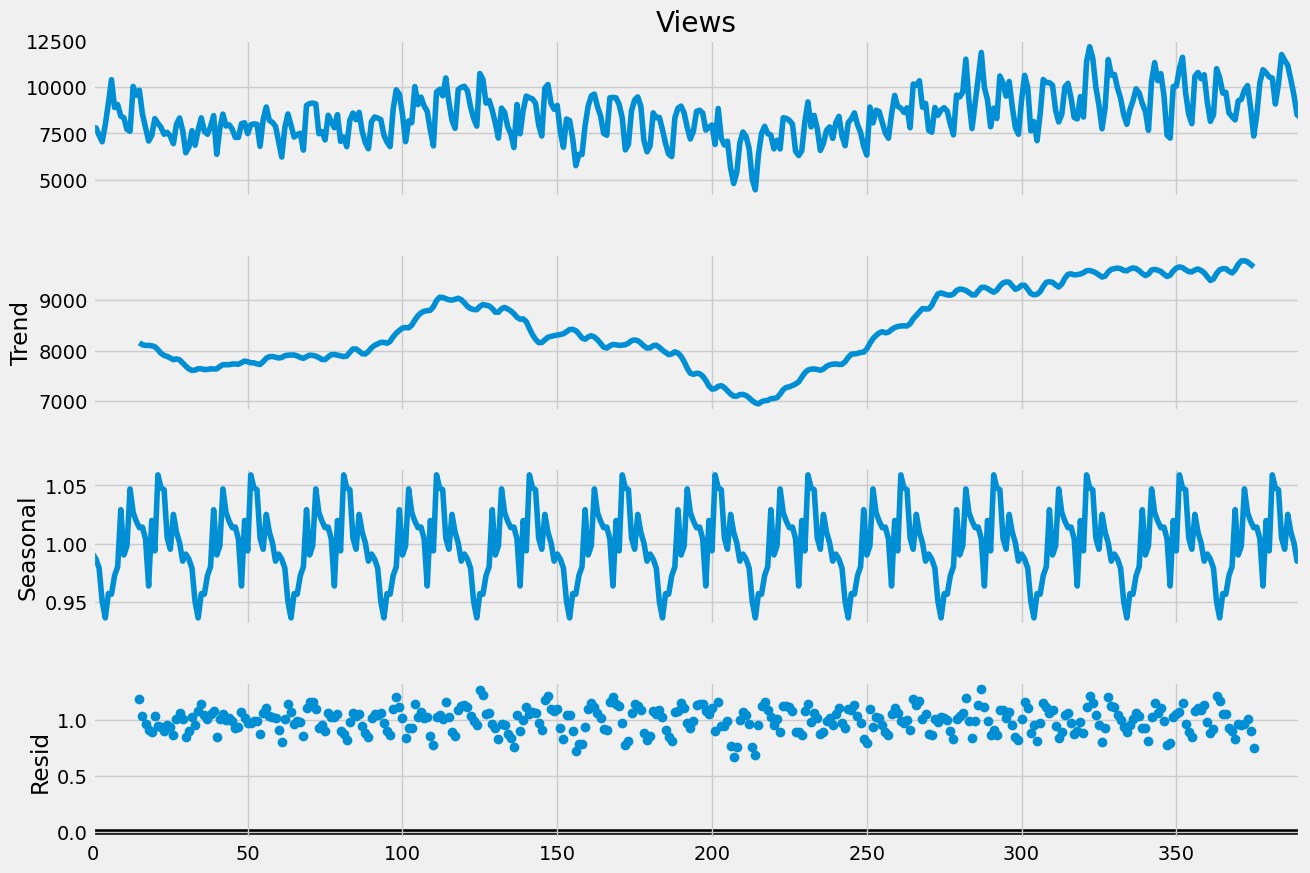

In [36]:
result = seasonal_decompose(df["Views"], model='multiplicative', period =30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

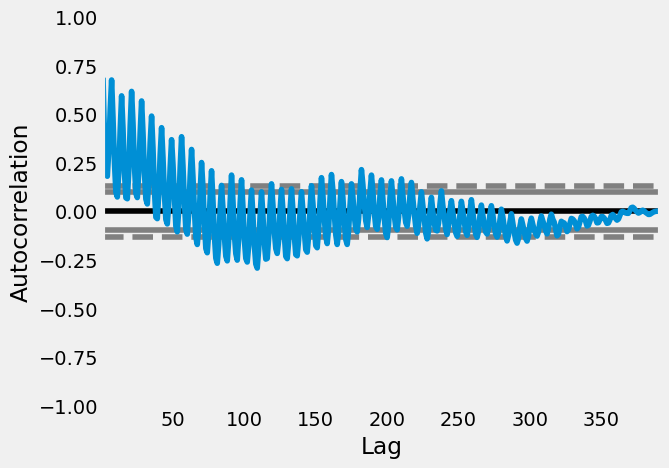

In [30]:
pd.plotting.autocorrelation_plot(df["Views"])

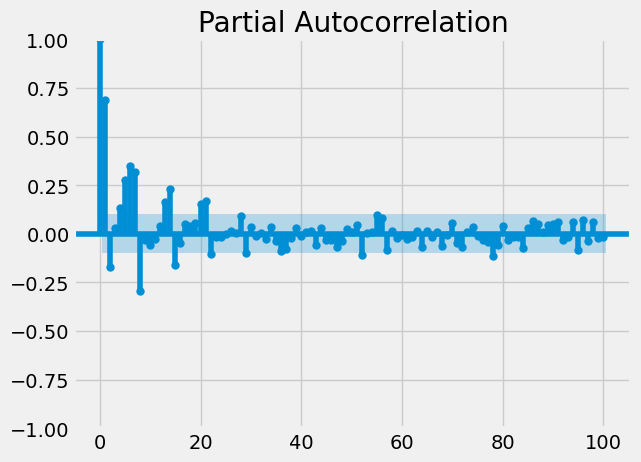

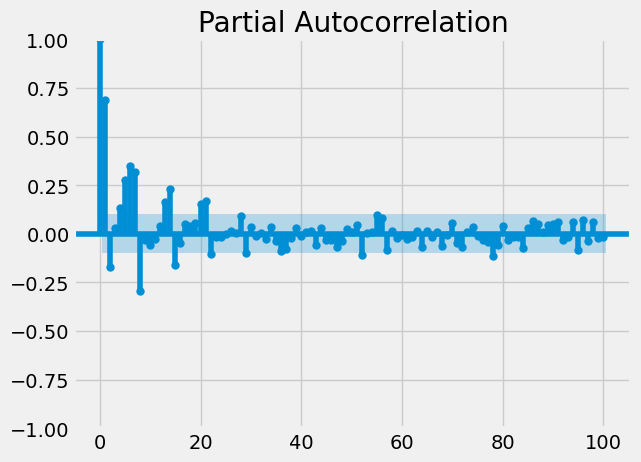

In [37]:
plot_pacf(df["Views"], lags = 100)

In [38]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(df['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/Users/vinay/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26940D+00    |proj g|=  5.28062D-01


 This problem is unconstrained.



At iterate    5    f=  8.06764D+00    |proj g|=  4.51780D-02

At iterate   10    f=  8.01428D+00    |proj g|=  4.59156D-02

At iterate   15    f=  7.98073D+00    |proj g|=  1.14090D-01

At iterate   20    f=  7.96097D+00    |proj g|=  1.73116D-02

At iterate   25    f=  7.95078D+00    |proj g|=  2.22045D-01

At iterate   30    f=  7.94313D+00    |proj g|=  1.85689D-01

At iterate   35    f=  7.93775D+00    |proj g|=  1.41415D-02

At iterate   40    f=  7.93364D+00    |proj g|=  2.13556D-02

At iterate   45    f=  7.92991D+00    |proj g|=  4.35517D-02

At iterate   50    f=  7.92600D+00    |proj g|=  1.06152D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/vinay/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.067
Date:                            Thu, 18 Jan 2024   AIC                           6228.135
Time:                                    11:38:30   BIC                           6287.158
Sample:                                         0   HQIC                          6251.560
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7395      0.130      5.692      0.000       0.485       0.994
ar.L2         -0.7896      0.134   

In [43]:
predictions = model.predict(len(df), len(df)+200)
print(predictions)

391     9889.068080
392    10855.505076
393    10722.049763
394     9824.940890
395     8819.285433
           ...     
587    11141.959380
588    11466.282271
589    11753.568074
590    11049.918323
591    10666.565495
Name: predicted_mean, Length: 201, dtype: float64


<Axes: >

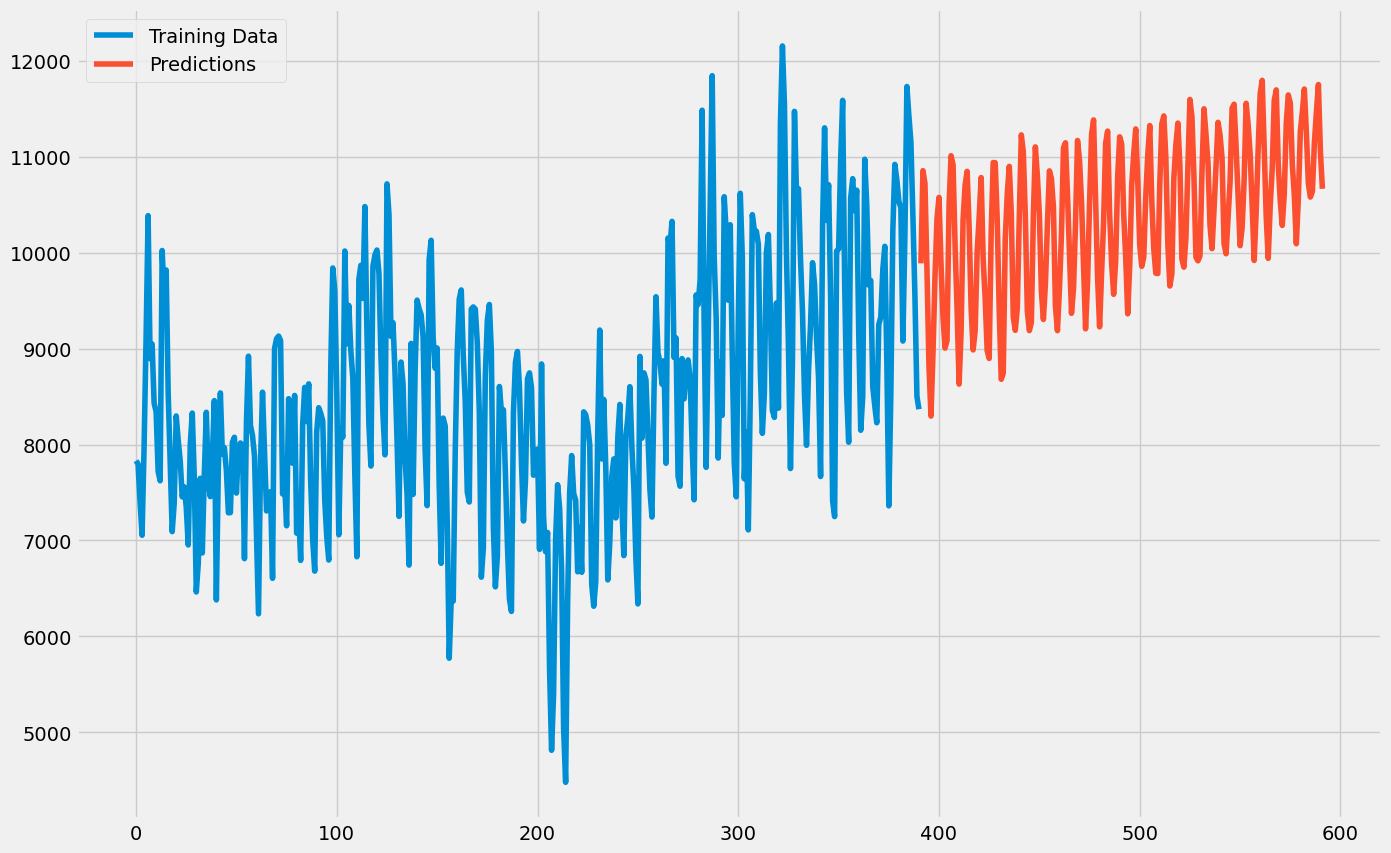

In [44]:
df["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")